## Text Document Classification Using Sparse Features

This notebook explores the classification of text documents using sparse features in clusters. The dataset comprises over 6,000 textual data entries, which have been scraped from a variety of reputable international sources. These sources include:

- **IMF Article IV**
- **IMF Financial Sector Assessment Program (FSAP) Reports**
- **IMF Debt Sustainability Analysis (DSA) Reports**
- **IMF World Economic Outlook**
- **IMF Global Financial Stability Report**
- **IMF Fiscal Monitor**
- **IMF Regional Economic Outlook**
- **United Nations Global Economy report**
- **United Nations News**
- **WTO News**

### Objective

The primary objective of this analysis is to use the descriptive content of the text to classify which source it originates from. A more ambitious aim is to determine whether certain clusters contain words that could be useful for understanding experts' predictions on next year's GDP growth, similar to approaches taken in previous supervised models.
GDP growth.


### The steps are:

- choosing K- 
evaluainge the clustering performance- answering 
how does clustering provide additional insights of the dat- answering a
how does the clustering results help with your confidence of supervised learning performancormance.

## K-means Clustering
- Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

In [164]:
from sklearn import datasets, decomposition
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [165]:
#  load the dataset
df = pd.read_csv('C:/Users/Victoria/OneDrive/文档/Dropbox/Machine Learning Python/Project/data_EDA.csv') 
df_aggregated = df.groupby('Year')['gdp'].mean().reset_index()
# assigns the GDP of the next year to the current row.
df_aggregated['next_year_gdp'] = df_aggregated['gdp'].shift(-1)

# Merge the lagged GDP data back to the original DataFrame
df = df.merge(df_aggregated[['Year', 'next_year_gdp']], on='Year', how='left')
# Creating a GDP Growth Dummy Variable:
df['next_year_gdp_grow_dummy'] = np.where(df['next_year_gdp'] > 0, 1, 0)


df.dropna(inplace=True)

In [166]:
custom_stop_words = set(ENGLISH_STOP_WORDS).union({'eif','million','programme','integrated','government','states', 'measures', '000','united','takes', 'basis','practices','place'})
custom_stop_words = list(custom_stop_words)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)
X = vectorizer.fit_transform(df['Description'])

In [167]:
# Apply K-means clustering
# Randomly initialize K cluster centroids
# Use the Elbow method to find a good number of clusters (k)
scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)
    print(f'For k={k} Silhouette score is {score}')

For k=2 Silhouette score is 0.022513135489221413
For k=3 Silhouette score is 0.024537875064468147
For k=4 Silhouette score is 0.022860370753517684
For k=5 Silhouette score is 0.027316724887539147
For k=6 Silhouette score is 0.028444346434482997
For k=7 Silhouette score is 0.026116181841050773
For k=8 Silhouette score is 0.02801901293086164
For k=9 Silhouette score is 0.030204659481427684
For k=10 Silhouette score is 0.0314292021628986
For k=11 Silhouette score is 0.0318704720196684
For k=12 Silhouette score is 0.03242320299604866
For k=13 Silhouette score is 0.035022817140912196
For k=14 Silhouette score is 0.034292047001218594
For k=15 Silhouette score is 0.03563278914484901
For k=16 Silhouette score is 0.03584800178508222
For k=17 Silhouette score is 0.037880058824046374
For k=18 Silhouette score is 0.038213515396349165
For k=19 Silhouette score is 0.04139401176310302
For k=20 Silhouette score is 0.03985352524660186
For k=21 Silhouette score is 0.040562674657572635
For k=22 Silhouett

In [168]:
from sklearn.metrics import davies_bouldin_score
X = X.toarray()
scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    # Calculate Davies-Bouldin Index for the current k
    db_index = davies_bouldin_score(X, kmeans.labels_)
    scores.append(db_index)
    print(f'For k={k} Davies-Bouldin Index is {db_index}')

For k=2 Davies-Bouldin Index is 6.392197407958434
For k=3 Davies-Bouldin Index is 5.9697052544729745
For k=4 Davies-Bouldin Index is 5.027492508387986
For k=5 Davies-Bouldin Index is 5.562784096011605
For k=6 Davies-Bouldin Index is 4.972695333199994
For k=7 Davies-Bouldin Index is 5.1182528168096715
For k=8 Davies-Bouldin Index is 4.957920344881929
For k=9 Davies-Bouldin Index is 5.249204154430849
For k=10 Davies-Bouldin Index is 5.209850546971291
For k=11 Davies-Bouldin Index is 5.165590238451382
For k=12 Davies-Bouldin Index is 5.158049258098955
For k=13 Davies-Bouldin Index is 4.9663292390512135
For k=14 Davies-Bouldin Index is 5.034071151155882
For k=15 Davies-Bouldin Index is 4.904222391144501
For k=16 Davies-Bouldin Index is 4.904771875847131
For k=17 Davies-Bouldin Index is 4.840160824439844
For k=18 Davies-Bouldin Index is 4.818512108663097
For k=19 Davies-Bouldin Index is 4.813625973291516
For k=20 Davies-Bouldin Index is 4.665909224477312
For k=21 Davies-Bouldin Index is 4.6

In [169]:

from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    # Calculate Calinski-Harabasz Index for the current k
    ch_index = calinski_harabasz_score(X, kmeans.labels_)
    scores.append(ch_index)
    print(f'For k={k} Calinski-Harabasz Index is {ch_index}')


For k=2 Calinski-Harabasz Index is 135.57506084621588
For k=3 Calinski-Harabasz Index is 109.74819562196801
For k=4 Calinski-Harabasz Index is 97.5232386965772
For k=5 Calinski-Harabasz Index is 85.96057674094772
For k=6 Calinski-Harabasz Index is 83.96345558195371
For k=7 Calinski-Harabasz Index is 79.79456661768046
For k=8 Calinski-Harabasz Index is 75.84980376030676
For k=9 Calinski-Harabasz Index is 71.52930696773332
For k=10 Calinski-Harabasz Index is 67.78260802968992
For k=11 Calinski-Harabasz Index is 64.74791608905325
For k=12 Calinski-Harabasz Index is 61.159409989640245
For k=13 Calinski-Harabasz Index is 59.183937395448766
For k=14 Calinski-Harabasz Index is 57.04653340499308
For k=15 Calinski-Harabasz Index is 55.05999345180337
For k=16 Calinski-Harabasz Index is 53.3150830794688
For k=17 Calinski-Harabasz Index is 52.03376774994184
For k=18 Calinski-Harabasz Index is 50.200263994570484
For k=19 Calinski-Harabasz Index is 48.74079164585496
For k=20 Calinski-Harabasz Index 

## Evaluating the clustering performance from different Ks

- The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. The values range from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. When k=26 Silhouette score is 0.047, the highest among all ks. his score is particularly sensitive to the compactness and separation of the clusters. It can indicate higher k values if smaller clusters are very distinct and cohesive.
- The Davies-Bouldin index is an internal evaluation scheme where lower values indicate that the clusters are more compact and well-separated, which is desirable. When k=27 Davies-Bouldin Index is 4.317, the lowest among all. 
- Calinski-Harabasz Index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. Higher values generally indicate a model with better defined clusters. The highest index value occurs at k=2 with a score of 135.575.  Tends to favor larger k values where clusters are dense and well-separated, but can sometimes suggest smaller k values if the increase in clusters leads to less distinct groups.
- I will use the k from silhouette score since I believe there are distinct and cohesive smaller clusters in the textual data. .

In [192]:
# Choose the best k based on silhouette score 
best_k = 26
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(X)

# Examples of results
df['cluster'] = kmeans.labels_
print(df[['Title', 'Description', 'cluster','next_year_gdp_grow_dummy','source']])

                                                  Title  \
43    CDP Chair at ECOSOC Informal Briefing on the O...   
44    World Economic Situation And Prospects: Decemb...   
45    Graduation of Bangladesh, Lao People’s Democra...   
46    CDP member at UNIDO’s Ministerial Conference o...   
47    Frontier Technology Issues: Frontier technolog...   
...                                                 ...   
6526                       New Zealand: Selected Issues   
6527                        Bangladesh: Selected Issues   
6528                          Mongolia: Selected Issues   
6529  Union of the Comoros: 2019 Article IV Consulta...   
6530  United States: 2020 Article IV Consultation-Pr...   

                                            Description  cluster  \
43          Climate change is above all an equity issue        6   
44    Favourable terms of trade provide much needed ...       11   
45    UN GA adopts resolution to graduate these thre...        6   
46    Davos-style d

In [193]:
# Get centroids
centroids = kmeans.cluster_centers_

features = vectorizer.get_feature_names_out()

In [194]:
# Display top features for each cluster
for i, centroid in enumerate(centroids):
    print(f"Top features for cluster {i}:")
    # Get the indices that would sort this centroid
    sorted_indices = centroid.argsort()[::-1]
    # Display the top 10 terms for this cluster
    for ind in sorted_indices[:10]:
        print(f"{features[ind]} ({centroid[ind]:.2f})", end=", ")
    print("\n")


Top features for cluster 0:
agriculture (0.12), negotiations (0.11), members (0.10), talks (0.09), chairperson (0.08), negotiating (0.08), group (0.08), meeting (0.07), ambassador (0.07), chair (0.06), 

Top features for cluster 1:
fiscal (0.11), growth (0.09), financial (0.06), economic (0.06), policy (0.06), directors (0.05), reforms (0.05), economy (0.05), authorities (0.05), term (0.05), 

Top features for cluster 2:
issued (0.18), panel (0.14), report (0.13), case (0.13), wt (0.10), certain (0.10), appellate (0.08), european (0.08), regarding (0.08), china (0.07), 

Top features for cluster 3:
iv (0.20), article (0.18), debt (0.17), staff (0.11), consultation (0.11), report (0.11), imf (0.08), sustainability (0.06), dsa (0.06), private (0.06), 

Top features for cluster 4:
percent (0.25), growth (0.16), 2017 (0.10), gdp (0.10), 2016 (0.08), highlights (0.08), consultation (0.07), iv (0.07), article (0.07), expected (0.07), 

Top features for cluster 5:
ministerial (0.20), conferen

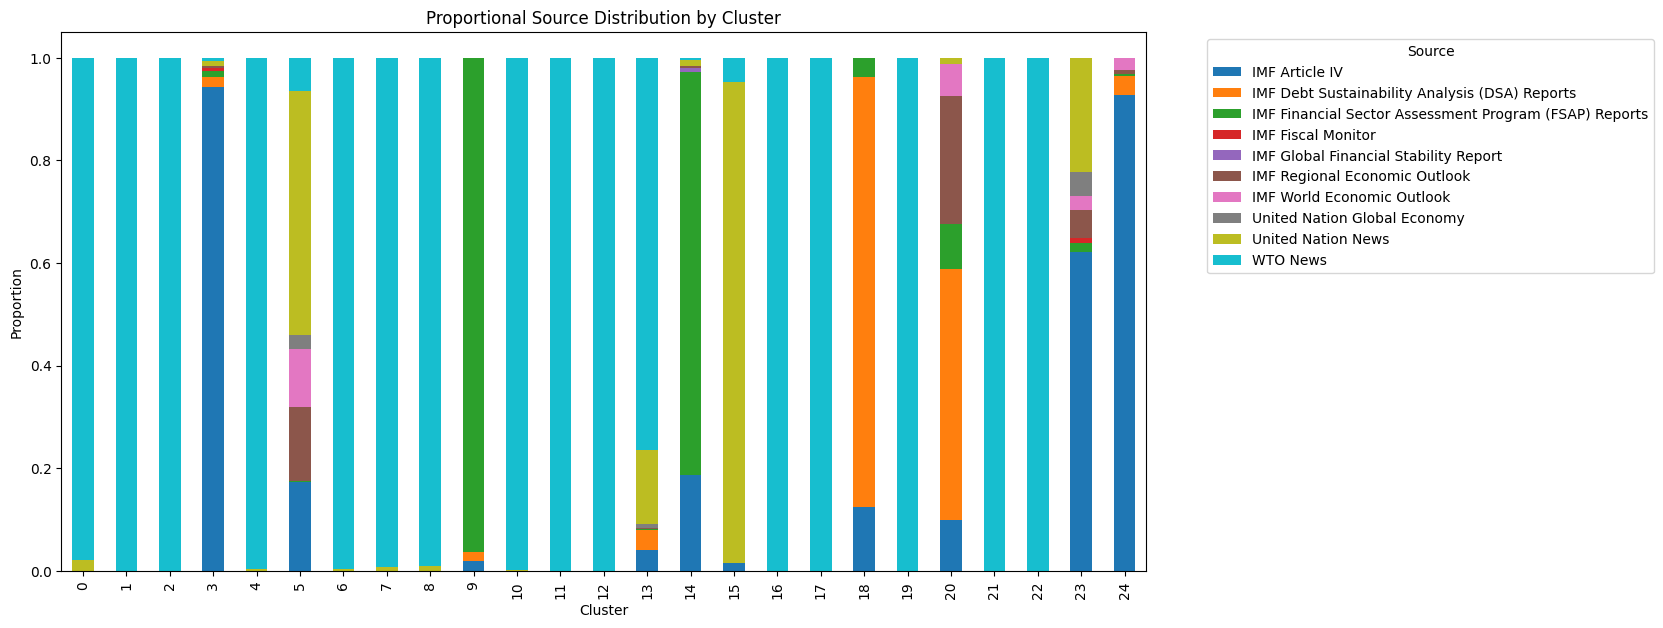

In [195]:
# Calculate proportions of each source within clusters
cluster_source_prop = cluster_source_ct.div(cluster_source_ct.sum(axis=1), axis=0)

# Plot the proportions for better comparability
cluster_source_prop.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Proportional Source Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Additional insights of the data

- Based on the top features from different clusters, one can infer which clusters belong to specific sources or categories. For example:
- 
Top features for clusters 0, 1, and 2 include terms such as "agriculture," "negotiations," "members," "chairperson," "negotiating," "meeting," "ambassador," "appellate," and "panel," which are commonly found in WTO press releases and news.
Top features for cluster 3 include words like "IV," "article," "debt," "staff," "consultation," "report," "IMF," "sustainability," and "DSA," indicating financial reports from the IMF Article I
V.
However, not all clusters are performing well. For instanc- e:

Top features for cluster 9 include "course," "WTO" (0.14), "training officials" (0.11), "Geneva" (0.09), "trade," "headquarters," and "institute organized." These terms might suggest a connection to WTO resources, but they are, in fact, from the IMF Financial Sector Assessment Program (FSAP) Rep- orts.
This analyshowcases the potential to identify and categorize textual data accurately by cluster featu|res but also highlights the challenges in ensuring the accuracy of these assignments, especially when similar terminology may span multiple sources.) 

In [196]:
# Calculate the average next year GDP per cluster and sort in descending order
cluster_gdp_growth_avg = df.groupby('cluster')['next_year_gdp'].mean().sort_values(ascending=False)

# Print the sorted averages
print("Average next year GDP Growth per Cluster:")
print(cluster_gdp_growth_avg)

Average next year GDP Growth per Cluster:
cluster
11    4.135784
23    3.228976
8     3.153656
5     3.126308
13    3.121460
21    3.084944
3     3.072191
18    3.067934
22    2.984313
19    2.972162
6     2.882772
10    2.829403
4     2.779536
7     2.708655
25    2.707351
24    2.705454
9     2.648206
12    2.641285
16    2.600045
2     2.597020
15    2.564690
20    2.512664
17    2.438920
14    2.225396
0     1.792981
1     1.748688
Name: next_year_gdp, dtype: float64


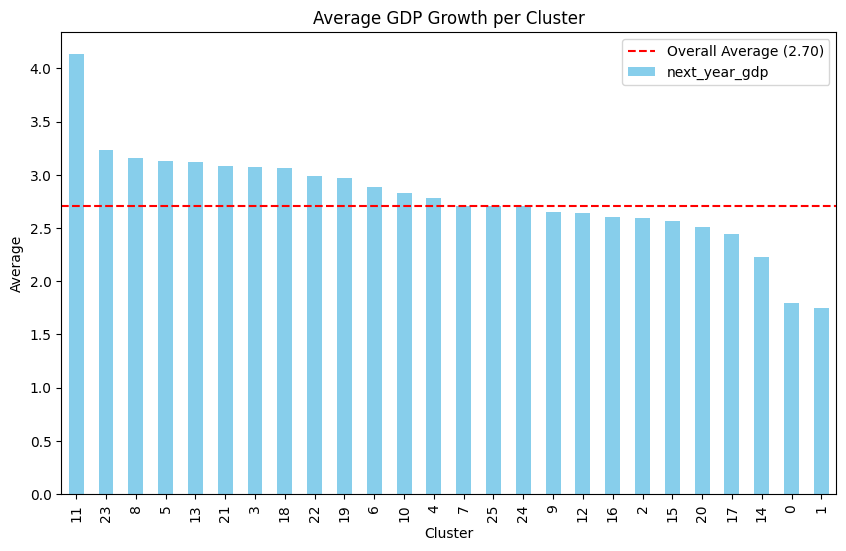

In [197]:
overall_avg = df['next_year_gdp'].mean()

# Plotting the average GDP growth dummy per cluster
cluster_gdp_growth_avg.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average GDP Growth per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average')
plt.axhline(y=overall_avg, color='red', linestyle='--', label=f'Overall Average ({overall_avg:.2f})')
plt.legend()
plt.show()


In [198]:
# Creating a crosstab of cluster and GDP growth dummy
cluster_gdp_ct = pd.crosstab(df['cluster'], df['next_year_gdp_grow_dummy'])
# Calculate proportions
cluster_gdp_prop = cluster_gdp_ct.div(cluster_gdp_ct.sum(axis=1), axis=0)

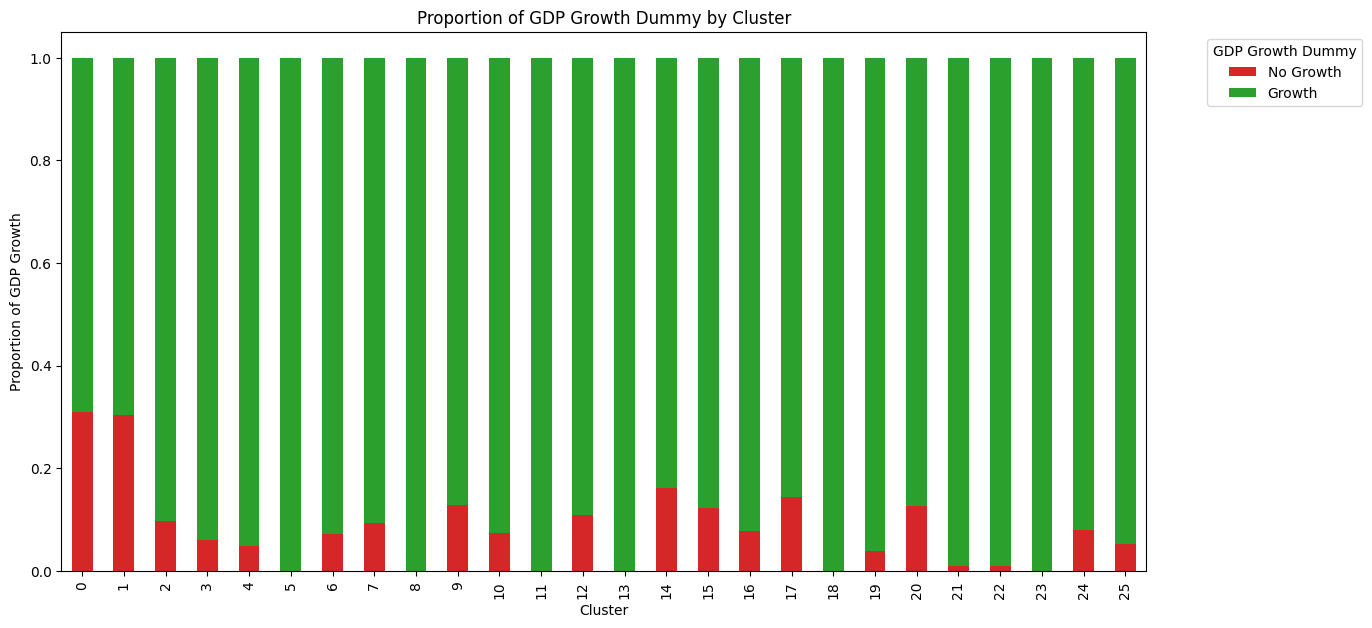

In [199]:
# Plot the proportions for better comparability
cluster_gdp_prop.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#d62728', '#2ca02c'])
plt.title('Proportion of GDP Growth Dummy by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of GDP Growth')
plt.legend(title='GDP Growth Dummy', labels=['No Growth', 'Growth'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###  Help supervised learning performance
1. Segmentation and Patterns: Identifying clusters within the data can highlight natural groupings or patterns that might not be immediately apparent. This can help in understanding the key characteristics that define each group, as indicated above.
2. Feature Discovery: Clusters can reveal relationships and correlations that can be engineered into new features for supervised learning models by providing additional information about subcategories.

   For example: 
Top features for cluster 11 include "pandemic," "COVID," "19," "economic," "2020," "2021," "recovery," "crisis," "economy," and "policy." These reveal that this cluster contains information about COVID-19 and related events during 2020 and 2021. Thus, when predictions indicate that the next year's GDP will be positive, it makes sense, as it aligns with the expected economic rebound to positive growth in 202
   
   Another example: The top features for cluster 15 include "financial," "assessment," "banks," "banking," "sector," "supervision," "stability," "framework," "risk," and its associated next year GDP is below average. This may indicate a weak signal that suggests potential financial risk and a drop in GDP.
   From the new information, one can generate a new indicator based on cluster assignments. 2.

In [208]:
X = df.drop(columns=['Year', 'gdp', 'Title', 'Description', 'gdp_normal',  'lag_gdp','gdp_grow_dummy','source',
                     'Tokenized_Description', 'Stem_Lemm_Description', 'Processed_Words', 'Joined_Words','next_year_gdp','next_year_gdp_grow_dummy'])  # Features
y = df['next_year_gdp_grow_dummy']  # Target variable
X.shape, y.shape

((5920, 33), (5920,))

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((4144, 33), (1776, 33))

In [210]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8980855855855856
Confusion Matrix:
 [[  18  157]
 [  24 1577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.10      0.17       175
           1       0.91      0.99      0.95      1601

    accuracy                           0.90      1776
   macro avg       0.67      0.54      0.56      1776
weighted avg       0.86      0.90      0.87      1776



In [219]:
probabilities = model.predict_proba(X_test)
y_scores = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7357151780137414


In [214]:
X_train_no_cluster = X_train.drop(['cluster'], axis=1)
X_test_no_cluster = X_test.drop(['cluster'], axis=1)

model_no_cluster = RandomForestClassifier(random_state=42)
model_no_cluster.fit(X_train_no_cluster, y_train)

predictions_no_cluster = model_no_cluster.predict(X_test_no_cluster)
print("Accuracy:", accuracy_score(y_test, predictions_no_cluster))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_no_cluster))
print("Classification Report:\n", classification_report(y_test, predictions_no_cluster))

Accuracy: 0.9003378378378378
Confusion Matrix:
 [[  10  165]
 [  12 1589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.06      0.10       175
           1       0.91      0.99      0.95      1601

    accuracy                           0.90      1776
   macro avg       0.68      0.52      0.52      1776
weighted avg       0.86      0.90      0.86      1776



In [220]:
probabilities = model_no_cluster.predict_proba(X_test_no_cluster)
y_scores = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.6323244400820917


### Compare with and without clustering labels

The accuracy is slightly higher in the model without cluster labels. This suggests that the inclusion of cluster labels does not improve the overall accuracy of the model significantly. The model with cluster labels has a slightly higher recall and f1-score for Class 0, indicating it is marginally better at identifying the minority class (ie. when next year gdp has no growth). The false positive count is smaller and the true positive count is slightly higher in the clustered model. When distinguishing between the positive and negative classes, roc-auc socre improves by 0.1, from 0.63232 to 0.73571. The clustered model performs better while restricting to only predict positive class.